In [1]:
import matplotlib.pylab as plt
import numpy as np
import scipy.io as sio
import netCDF4 as nc

from salishsea_tools import viz_tools
from nowcast.figures import research_VENUS
from nowcast import analyze

import energy_flux as ef
import datetime

import os

%matplotlib inline

In [2]:
grid=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
NEMO_lons = grid.variables['nav_lon'][:]
NEMO_lats = grid.variables['nav_lat'][:]
bathy=grid.variables['Bathymetry'][:]

mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
tmask = mesh.variables['tmask'][0,:,:,:]
e3t = mesh.variables['e3t'][0,:,:,:]
e2t = mesh.variables['e2t'][0,:,:]
e1t = mesh.variables['e1t'][0,:,:]

In [3]:
def load_area(areaname, date1, date2, path):
    
    d1str = date1.strftime('%Y%m%d')
    d2str = date2.strftime('%Y%m%d')
    
    data = sio.loadmat(os.path.join(path, '{}_region_{}_{}_ssh'.format(areaname, d1str, d2str)))
    sshstruc = data['sshstruc']

    data = sio.loadmat(os.path.join(path, '{}_region_baroclinic_{}_{}_masked'.format(areaname, d1str, d2str)))
    bcstruc = data['datastruc']

    data = sio.loadmat(os.path.join(path, '{}_region_{}_{}_pbc_t'.format(areaname, d1str, d2str)))
    pbc_t_struc = data['pbc_t_struc']

    data = sio.loadmat(os.path.join(path, '{}_region_depav_{}_{}_masked'.format(areaname, d1str, d2str)))
    btstruc = data['datastruc']
    
    return sshstruc, bcstruc, pbc_t_struc, btstruc

# JDF

In [4]:
area = 'JuandeFuca'
path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/'
d1 = datetime.datetime(2014,11,26)
d2 = datetime.datetime(2015,4,26)
sshs, bcs, pbcs, bts= load_area(area, d1,d2,path)

In [5]:
column_depth = ef.water_depth(tmask,e3t)

In [6]:
const = 'K1'
lons = sshs['lons'][0,0]
lats = sshs['lats'][0,0]

jstart,istart = ef.find_starting_index(NEMO_lons,NEMO_lats,lons[0,0],lats[0,0])
    
Fxbt,Fybt = ef.barotropic_flux(sshs, bts, const)
jend = jstart + Fxbt.shape[-1]
iend = istart + Fxbt.shape[0]

Fxbt_depint = Fxbt*column_depth[jstart:jend, istart:iend].T
Fybt_depint = Fybt*column_depth[jstart:jend, istart:iend].T
    


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


In [7]:
# Roate back to NEMO space
theta = -29
theta_rad = theta * np.pi / 180

Fxbt_depint_N = Fxbt_depint * np.cos(theta_rad) - Fybt_depint * np.sin(theta_rad)
Fybt_depint_N = Fxbt_depint * np.sin(theta_rad) + Fybt_depint * np.cos(theta_rad)

/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


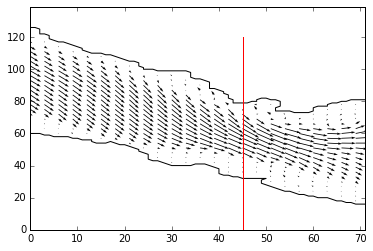

In [8]:
fig,ax=plt.subplots(1,1)
st=3
x=np.arange(Fxbt_depint_N.T.shape[-1])
y=np.arange(Fxbt_depint_N.T.shape[0])
xx, yy= np.meshgrid(x,y)
ax.quiver(xx[::st,::st], yy[::st,::st], Fxbt_depint_N.T[::st,::st], Fybt_depint_N.T[::st,::st] , scale=2*1e6)
ax.contour(xx,yy,bathy.data[jstart:jend,istart:iend], [0],colors='k',zorder=0)
ax.plot([45,45], [0,120],'-r')

In [9]:
ny = 0
nx = 1

i=45

flux = Fxbt_depint_N.T*e2t[jstart:jend,istart:iend]*nx +Fybt_depint_N.T*e1t[jstart:jend,istart:iend]*ny
flux_line = np.sum(flux[:,i])

print(flux_line/1e6) #in mega watts since divice by 1e6

959.478106158


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


# Victoria

In [10]:
area = 'VictoriaSill'
path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/'
d1 = datetime.datetime(2014,11,26)
d2 = datetime.datetime(2015,4,26)
sshs, bcs, pbcs, bts= load_area(area, d1,d2,path)

In [11]:
const = 'K1'
lons = sshs['lons'][0,0]
lats = sshs['lats'][0,0]

jstart,istart = ef.find_starting_index(NEMO_lons,NEMO_lats,lons[0,0],lats[0,0])
    
Fxbt,Fybt = ef.barotropic_flux(sshs, bts, const)
jend = jstart + Fxbt.shape[-1]
iend = istart + Fxbt.shape[0]

Fxbt_depint = Fxbt*column_depth[jstart:jend, istart:iend].T
Fybt_depint = Fybt*column_depth[jstart:jend, istart:iend].T
    


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


In [12]:
# Roate back to NEMO space
theta = -29
theta_rad = theta * np.pi / 180

Fxbt_depint_N = Fxbt_depint * np.cos(theta_rad) - Fybt_depint * np.sin(theta_rad)
Fybt_depint_N = Fxbt_depint * np.sin(theta_rad) + Fybt_depint * np.cos(theta_rad)

/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


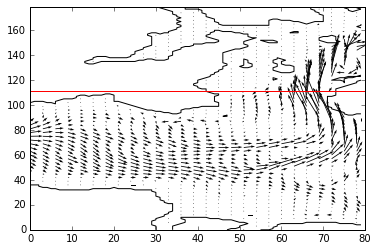

In [13]:
fig,ax=plt.subplots(1,1)
st=3
x=np.arange(Fxbt_depint_N.T.shape[-1])
y=np.arange(Fxbt_depint_N.T.shape[0])
xx, yy= np.meshgrid(x,y)
ax.quiver(xx[::st,::st], yy[::st,::st], Fxbt_depint_N.T[::st,::st], Fybt_depint_N.T[::st,::st] , scale=2*1e6)
ax.contour(xx,yy,bathy.data[jstart:jend,istart:iend], [0],colors='k',zorder=0)
ax.plot([0,80], [111,111],'-r')

In [14]:
ny = 1
nx = 0

j=111

flux = Fxbt_depint_N.T*e2t[jstart:jend,istart:iend]*nx +Fybt_depint_N.T*e1t[jstart:jend,istart:iend]*ny
flux_line = np.sum(flux[j,:])

print(flux_line/1e6) #in mega watts since divice by 1e6

496.117066627


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


# Boundary Pass

In [15]:
area = 'BP'
path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/'
d1 = datetime.datetime(2014,11,26)
d2 = datetime.datetime(2015,4,26)
sshs, bcs, pbcs, bts= load_area(area, d1,d2,path)

In [16]:
const = 'K1'
lons = sshs['lons'][0,0]
lats = sshs['lats'][0,0]

jstart,istart = ef.find_starting_index(NEMO_lons,NEMO_lats,lons[0,0],lats[0,0])
    
Fxbt,Fybt = ef.barotropic_flux(sshs, bts, const)
jend = jstart + Fxbt.shape[-1]
iend = istart + Fxbt.shape[0]

Fxbt_depint = Fxbt*column_depth[jstart:jend, istart:iend].T
Fybt_depint = Fybt*column_depth[jstart:jend, istart:iend].T
    


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/numpy/ma/core.py:3172: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


In [17]:
# Roate back to NEMO space
theta = -29
theta_rad = theta * np.pi / 180

Fxbt_depint_N = Fxbt_depint * np.cos(theta_rad) - Fybt_depint * np.sin(theta_rad)
Fybt_depint_N = Fxbt_depint * np.sin(theta_rad) + Fybt_depint * np.cos(theta_rad)

/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


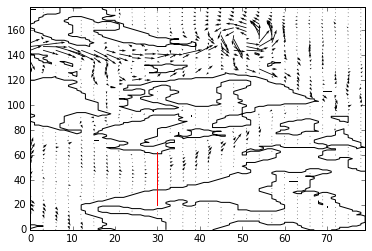

In [18]:
fig,ax=plt.subplots(1,1)
st=3
x=np.arange(Fxbt_depint_N.T.shape[-1])
y=np.arange(Fxbt_depint_N.T.shape[0])
xx, yy= np.meshgrid(x,y)
ax.quiver(xx[::st,::st], yy[::st,::st], Fxbt_depint_N.T[::st,::st], Fybt_depint_N.T[::st,::st] , scale=2*1e6)
ax.contour(xx,yy,bathy.data[jstart:jend,istart:iend], [0],colors='k',zorder=0)
ax.plot([30,30], [20,62],'-r')

In [19]:
ny = 0
nx = 1

i=30

flux = Fxbt_depint_N.T*e2t[jstart:jend,istart:iend]*nx +Fybt_depint_N.T*e1t[jstart:jend,istart:iend]*ny
flux_line = np.sum(flux[20:63,i])

print(flux_line/1e6) #in mega watts since divice by 1e6

86.9844505765


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


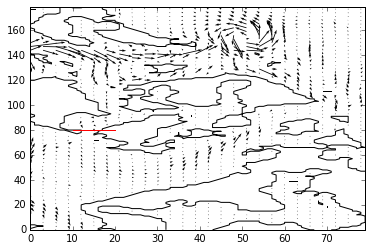

In [20]:
fig,ax=plt.subplots(1,1)
st=3
x=np.arange(Fxbt_depint_N.T.shape[-1])
y=np.arange(Fxbt_depint_N.T.shape[0])
xx, yy= np.meshgrid(x,y)
ax.quiver(xx[::st,::st], yy[::st,::st], Fxbt_depint_N.T[::st,::st], Fybt_depint_N.T[::st,::st] , scale=2*1e6)
ax.contour(xx,yy,bathy.data[jstart:jend,istart:iend], [0],colors='k',zorder=0)
ax.plot([10,20], [80,80],'-r')

In [21]:
ny = 1
nx = 0

j=80

flux = Fxbt_depint_N.T*e2t[jstart:jend,istart:iend]*nx +Fybt_depint_N.T*e1t[jstart:jend,istart:iend]*ny
flux_line = np.sum(flux[j,10:20])

print(flux_line/1e6) #in mega watts since divice by 1e6

-20.1175366238


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
